In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('covid_19_india.csv')

In [3]:
summary_statistics = df.describe(include='all')
print(summary_statistics)


                 Sno        Date     Time State/UnionTerritory  \
count   18110.000000       18110    18110                18110   
unique           NaN         560        7                   46   
top              NaN  2020-06-11  8:00 AM               Kerala   
freq             NaN          37    16472                  560   
mean     9055.500000         NaN      NaN                  NaN   
std      5228.051023         NaN      NaN                  NaN   
min         1.000000         NaN      NaN                  NaN   
25%      4528.250000         NaN      NaN                  NaN   
50%      9055.500000         NaN      NaN                  NaN   
75%     13582.750000         NaN      NaN                  NaN   
max     18110.000000         NaN      NaN                  NaN   

       ConfirmedIndianNational ConfirmedForeignNational         Cured  \
count                    18110                    18110  1.811000e+04   
unique                      62                       12      

In [4]:
#Selecting numerical columns because histograms  only uses continous values 
numerical_columns = df.select_dtypes(include=['int64']).columns


In [5]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


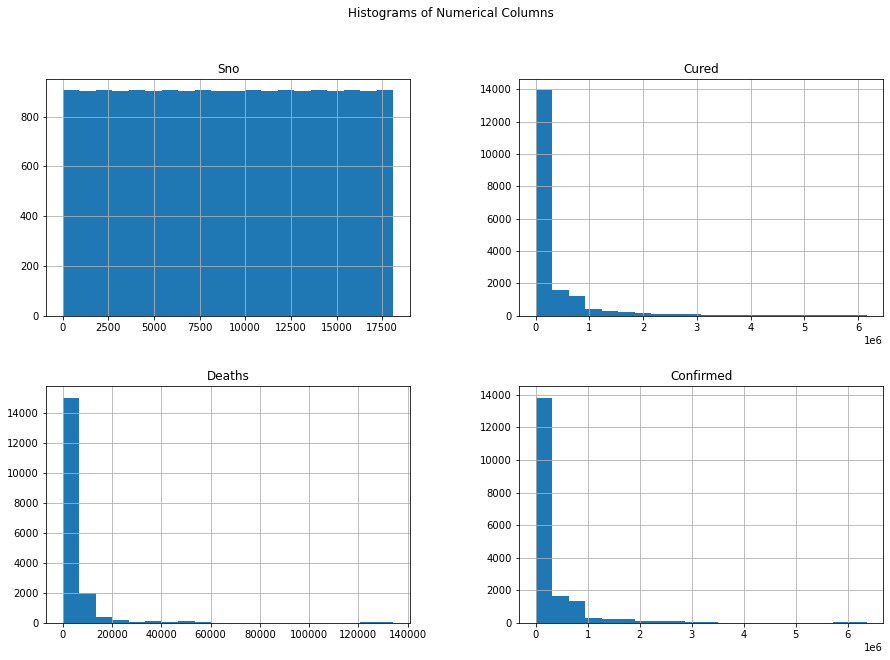

In [6]:
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()


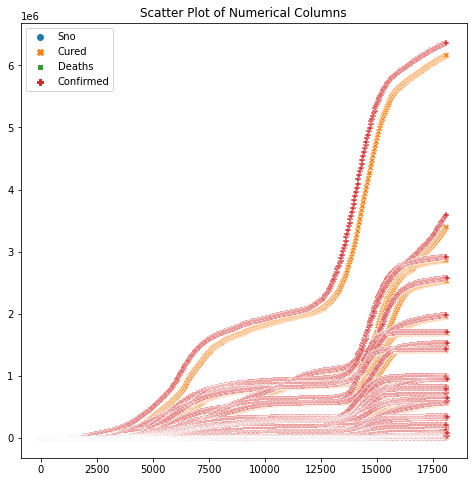

In [29]:
#plt.figure(figsize=(8,8))
#sns.boxplot(data=df[numerical_columns] )
#plt.title('Box-and-Whisker Plots of Numerical Columns')
#plt.show()
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df[numerical_columns])
plt.title('Scatter Plot of Numerical Columns')
plt.show()

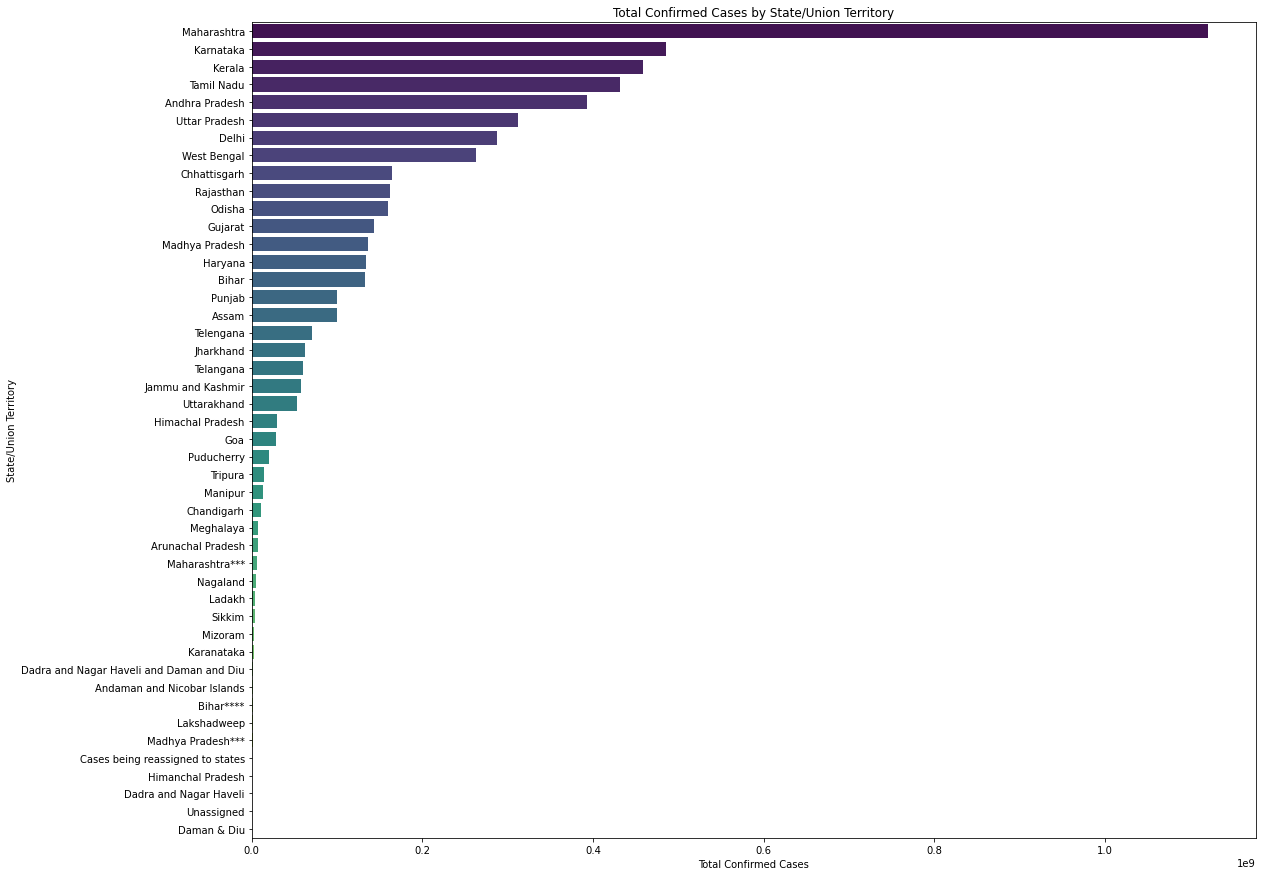

In [8]:
#Bar chart 
#Confirmed Cases by State:
state_confirmed = df.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(18, 15))
sns.barplot(x=state_confirmed.values, y=state_confirmed.index, palette='viridis')
plt.title('Total Confirmed Cases by State/Union Territory')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('State/Union Territory')
plt.show()

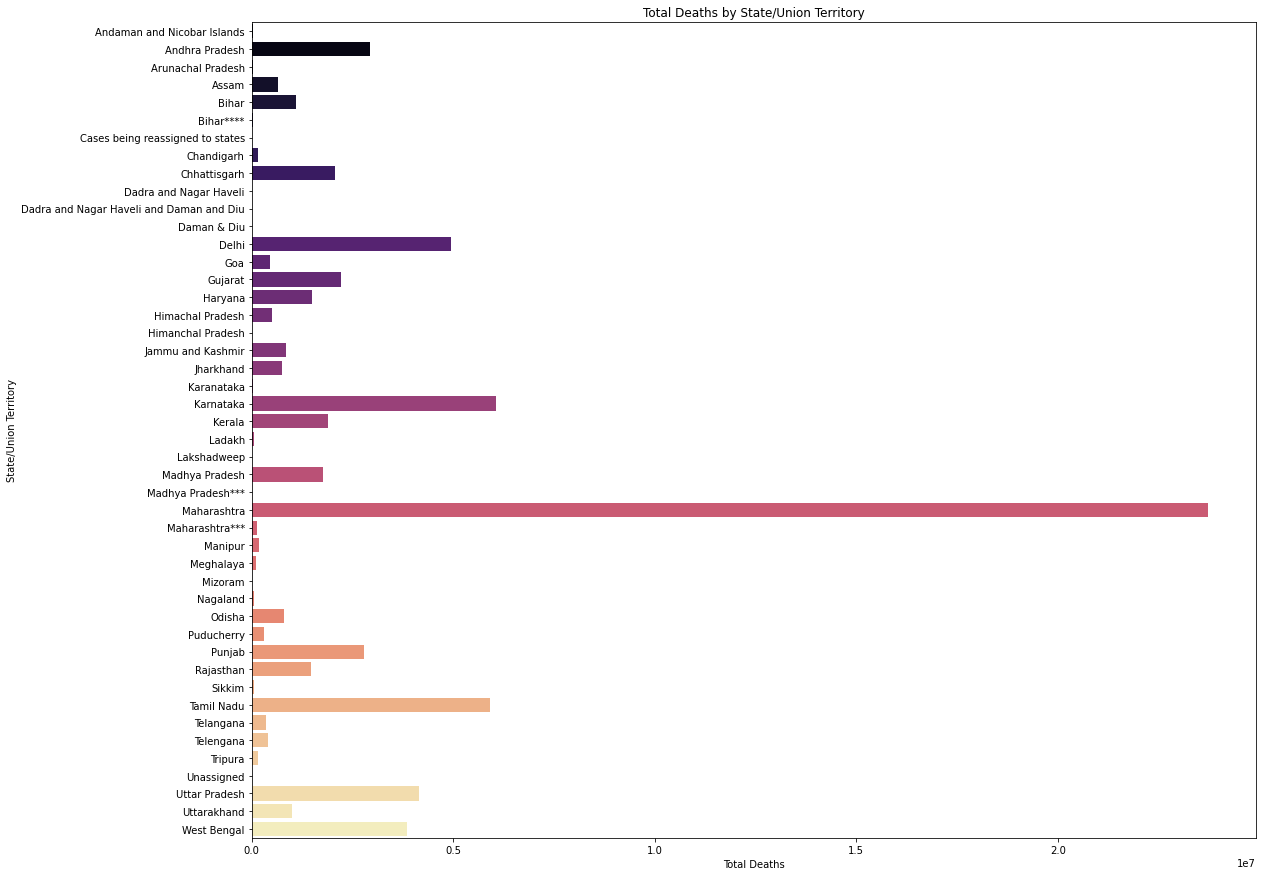

In [9]:
# Deaths by state 
# Group data by State and sum the deaths
state_deaths = df.groupby('State/UnionTerritory')['Deaths'].sum()
# Plot a bar chart
plt.figure(figsize=(18,15))
sns.barplot(x=state_deaths.values, y=state_deaths.index, palette='magma')
plt.title('Total Deaths by State/Union Territory')
plt.xlabel('Total Deaths')
plt.ylabel('State/Union Territory')
plt.show()


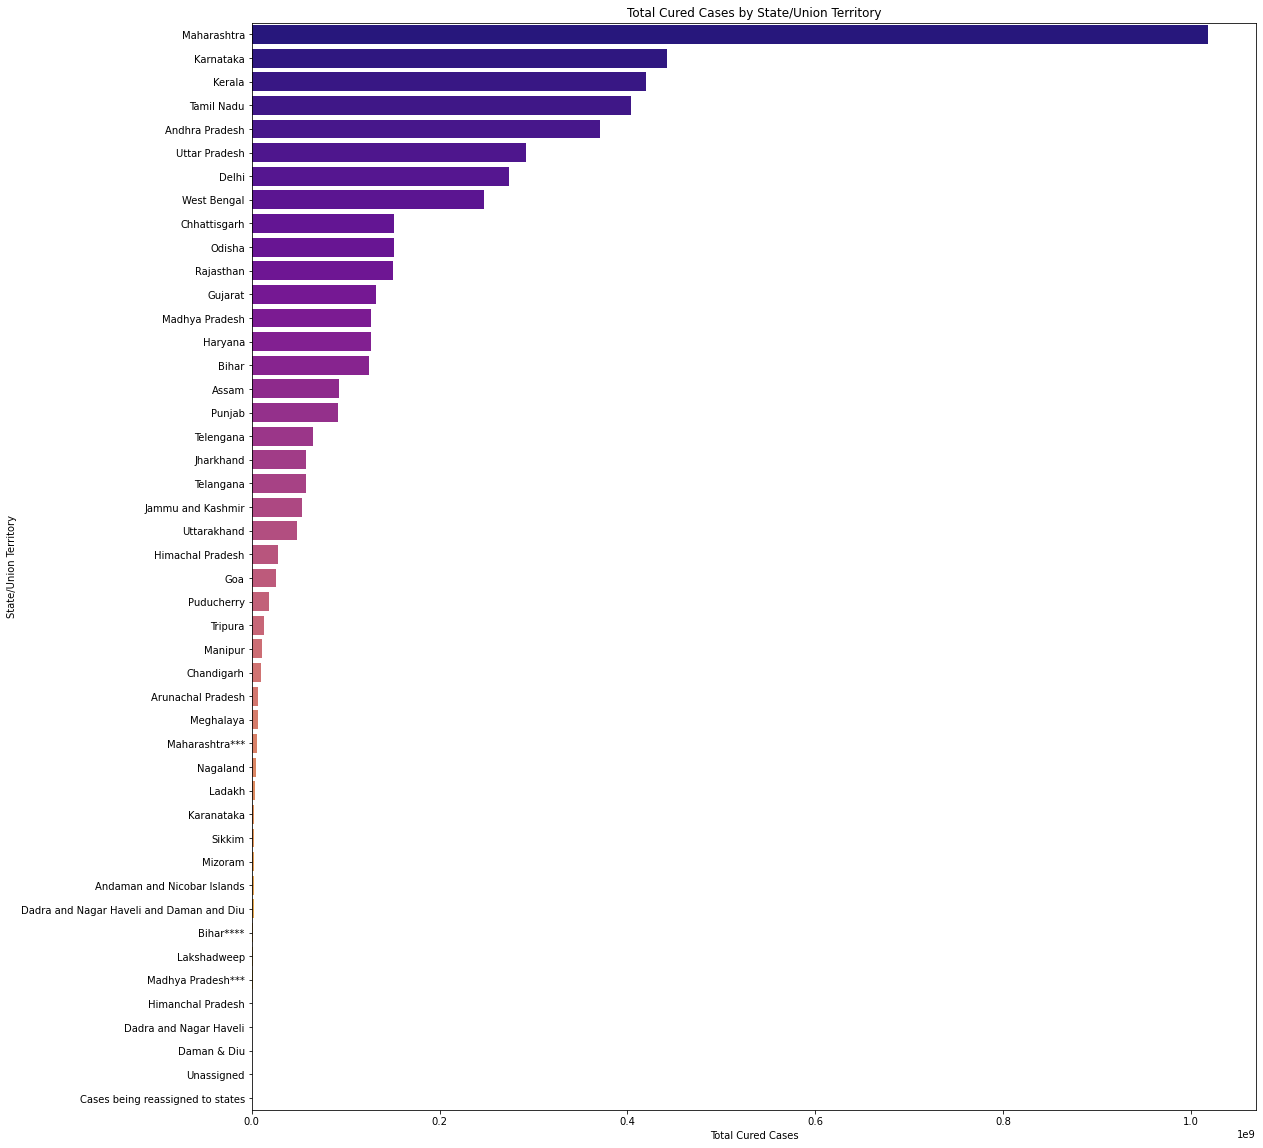

In [10]:
# Cured cases by state 
state_cured = df.groupby('State/UnionTerritory')['Cured'].sum().sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(18,20))
sns.barplot(x=state_cured.values, y=state_cured.index, palette='plasma')
plt.title('Total Cured Cases by State/Union Territory')
plt.xlabel('Total Cured Cases')
plt.ylabel('State/Union Territory')
plt.show()


In [11]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [12]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [13]:
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [14]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [15]:
df.isin(['-']).sum()

Sno                             0
Date                            0
Time                            0
State/UnionTerritory            0
ConfirmedIndianNational     17664
ConfirmedForeignNational    17664
Cured                           0
Deaths                          0
Confirmed                       0
dtype: int64

In [16]:

# First, convert '-' to NaN in the relevant columns
df['ConfirmedIndianNational'] = pd.to_numeric(df['ConfirmedIndianNational'].replace('-', np.nan), errors='coerce')
df['ConfirmedForeignNational'] = pd.to_numeric(df['ConfirmedForeignNational'].replace('-', np.nan), errors='coerce')

# Calculate percentages and round off
df['ConfirmedIndianNational'] = df['ConfirmedIndianNational'].fillna(0) + round(0.9 * df['Confirmed'])
df['ConfirmedForeignNational'] = df['ConfirmedForeignNational'].fillna(0) + round(0.1 * df['Confirmed'])

# Round off to the nearest integer
df['ConfirmedIndianNational'] = df['ConfirmedIndianNational'].astype(int)
df['ConfirmedForeignNational'] = df['ConfirmedForeignNational'].astype(int)


In [17]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,2,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,2,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,4,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,6,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,6,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,585318,65035,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,72594,8066,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,308216,34246,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,1537931,170881,1685492,22775,1708812


In [18]:
df.isin(['-']).sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [19]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

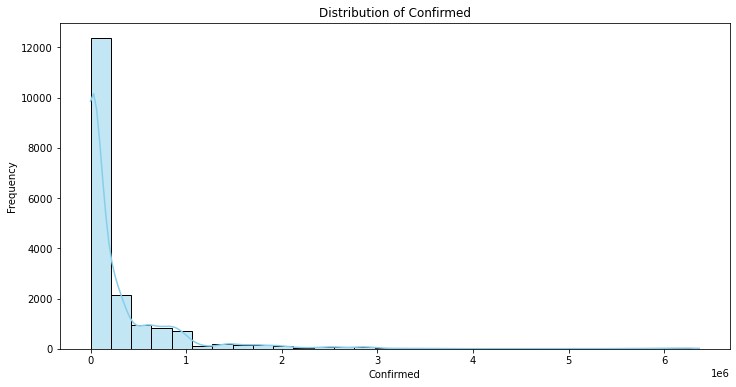

In [20]:
# Data Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Confirmed'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Confirmed')
plt.xlabel('Confirmed')
plt.ylabel('Frequency')
plt.show()
#Mode < Median < Mean


In [21]:
from scipy.stats import skew, kurtosis
skewness = skew(df['Confirmed'])
kurtotic = kurtosis(df['Confirmed'])
print('Skewness of Confirmed is ', skewness)
print(f'Kurtosis of  Confirmed is ' , kurtotic )

# skewed data means Covid-19 affected some states highly compared
# other states 

#since data is skewed and kurtotic we should use median as measure of central tendency 
#as median is less affected by extreme values as compared to mean 

Skewness of Confirmed is  4.85090256686737
Kurtosis of  Confirmed is  32.1763946989199


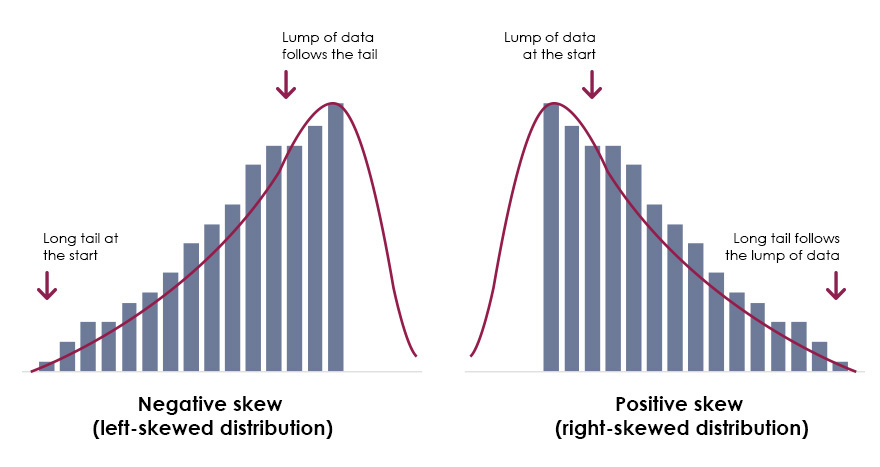

In [22]:
#high positive value For Skewness means Right skewed data
#high positive value for Confirmed means A heavy tail 
from IPython.display import Image
Image(filename='example.jpg',width = 500 , height = 800) 

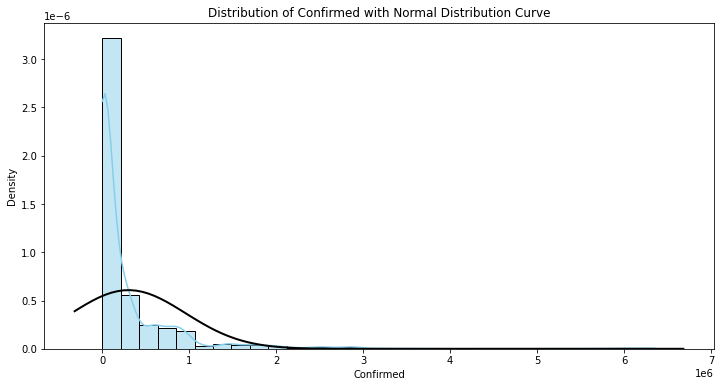

In [23]:
#As some models require normality 
#we will check if data follows a normal distribution or not 
#noramlize y-axis values 
#for creating a normal distribution curve , generate x - values 
#calculate the pdf values for each of these x(s)
#plot the curve 'k' is for black color 
plt.figure(figsize=(12, 6))
sns.histplot(df['Confirmed'], kde=True, color='skyblue', bins=30, stat='density')
plt.title('Distribution of Confirmed with Normal Distribution Curve')
plt.xlabel('Confirmed')
plt.ylabel('Density')

from scipy.stats import norm
xmin, xmax = plt.xlim() #minmax vals from x,y axes
x = np.linspace(xmin, xmax, 100) #creates 100 x-values 
p = norm.pdf(x, df['Confirmed'].mean(), df['Confirmed'].std())
plt.plot(x, p, 'k', linewidth=2)
plt.show()


In [24]:
##Correlation Analysis
#Values closer to 1 indicate a strong positive correlation, 
#values closer to -1 indicate a strong negative correlation, 
#and values around 0 suggest a weak or no correlation.


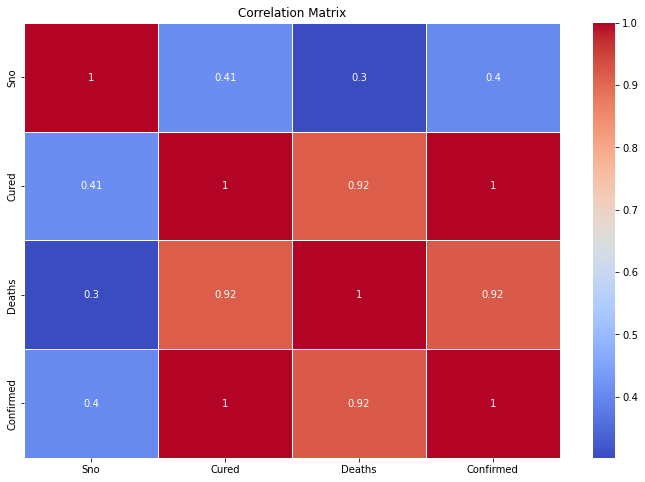

In [25]:

numerical_columns = df.select_dtypes(include=['int64']).columns

#corelation matrics
correlation_matrix = df[numerical_columns].corr()
# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#model overfit
#difficulty in selecting important variable 


In [26]:
print ("hello world")

hello world


In [30]:
#Z-Scores for outlier detection 

z_scores = (df['Confirmed'] - df['Confirmed'].mean()) / df['Confirmed'].std()
threshold = 3
outliers = df[abs(z_scores) > threshold]

#outlier handling necessary else model may give inaccurate ans



In [34]:
##Outlier Labelling
z_scores = (df['Confirmed'] - df['Confirmed'].mean()) / df['Confirmed'].std()
threshold = 3
outliers = df[abs(z_scores) > threshold]
outliers['Outlier_Label'] = 'Yes'
print(outliers)



         Sno        Date     Time State/UnionTerritory  \
12658  12659  2021-03-13  8:00 AM          Maharashtra   
12694  12695  2021-03-14  8:00 AM          Maharashtra   
12730  12731  2021-03-15  8:00 AM          Maharashtra   
12766  12767  2021-03-16  8:00 AM          Maharashtra   
12802  12803  2021-03-17  8:00 AM          Maharashtra   
...      ...         ...      ...                  ...   
18068  18069  2021-08-10  8:00 AM           Tamil Nadu   
18089  18090  2021-08-11  8:00 AM            Karnataka   
18090  18091  2021-08-11  8:00 AM               Kerala   
18094  18095  2021-08-11  8:00 AM          Maharashtra   
18104  18105  2021-08-11  8:00 AM           Tamil Nadu   

       ConfirmedIndianNational  ConfirmedForeignNational    Cured  Deaths  \
12658                  2053972                    228219  2117744   52723   
12694                  2068014                    229779  2125211   52811   
12730                  2082972                    231441  2134072   5286

C:\Users\RED\AppData\Local\Temp\ipykernel_81916\3412097697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Outlier_Label'] = 'Yes'


In [35]:
outliers

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Outlier_Label
12658,12659,2021-03-13,8:00 AM,Maharashtra,2053972,228219,2117744,52723,2282191,Yes
12694,12695,2021-03-14,8:00 AM,Maharashtra,2068014,229779,2125211,52811,2297793,Yes
12730,12731,2021-03-15,8:00 AM,Maharashtra,2082972,231441,2134072,52861,2314413,Yes
12766,12767,2021-03-16,8:00 AM,Maharashtra,2096518,232946,2144743,52909,2329464,Yes
12802,12803,2021-03-17,8:00 AM,Maharashtra,2112595,234733,2154253,52996,2347328,Yes
...,...,...,...,...,...,...,...,...,...,...
18068,18069,2021-08-10,8:00 AM,Tamil Nadu,2319513,257724,2522470,34340,2577237,Yes
18089,18090,2021-08-11,8:00 AM,Karnataka,2628944,292105,2861499,36848,2921049,Yes
18090,18091,2021-08-11,8:00 AM,Kerala,3228024,358669,3396184,18004,3586693,Yes
18094,18095,2021-08-11,8:00 AM,Maharashtra,5727098,636344,6159676,134201,6363442,Yes


In [36]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,2,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,2,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,4,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,6,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,6,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,585318,65035,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,72594,8066,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,308216,34246,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,1537931,170881,1685492,22775,1708812


In [37]:
#Standardization
from sklearn.preprocessing import StandardScaler
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,-1.731955,2020-01-30,6:00 PM,Kerala,2,0,-0.453162,-0.371141,-0.458796
1,-1.731764,2020-01-31,6:00 PM,Kerala,2,0,-0.453162,-0.371141,-0.458796
2,-1.731573,2020-02-01,6:00 PM,Kerala,4,0,-0.453162,-0.371141,-0.458795
3,-1.731381,2020-02-02,6:00 PM,Kerala,6,0,-0.453162,-0.371141,-0.458793
4,-1.731190,2020-02-03,6:00 PM,Kerala,6,0,-0.453162,-0.371141,-0.458793
...,...,...,...,...,...,...,...,...,...
18105,1.731190,2021-08-11,8:00 AM,Telangana,585318,65035,0.585116,-0.020277,0.532396
18106,1.731381,2021-08-11,8:00 AM,Tripura,72594,8066,-0.326614,-0.300345,-0.335865
18107,1.731573,2021-08-11,8:00 AM,Uttarakhand,308216,34246,0.091096,0.303660,0.063144
18108,1.731764,2021-08-11,8:00 AM,Uttar Pradesh,1537931,170881,2.288037,1.714716,2.145579
